系数（斜率）: 0.44066831836707876
截距: -0.6505572664479802
均方误差 (MSE): 0.06351735484715113
决定系数 (R²): 0.9091166623808649


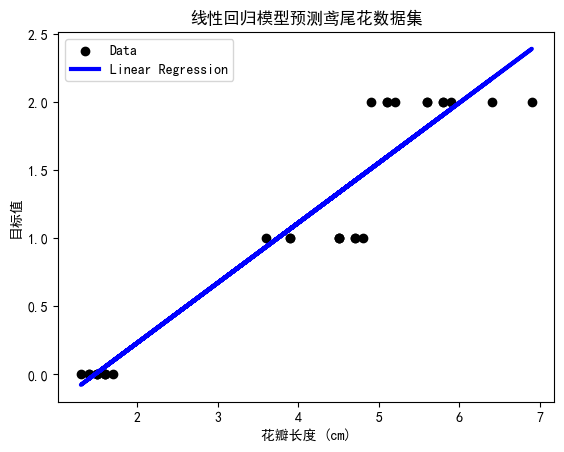

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib

# 设置字体为SimHei，确保该字体在你的系统中存在
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 加载鸢尾花数据集
def LoadIrisDataset():
    # 1.加载鸢尾花数据集
    iris = datasets.load_iris()
    X = iris.data  # 特征数据，包含所有样本的4个特征
    y = iris.target  # 目标变量，目前我们只使用第一个目标（0-1-2类）
    # 2.我们选择使用一个特征来进行线性回归，例如花瓣长度
    X = X[:, [2]]  # 选择第三个特征：花瓣长度
    # 3.将数据集分为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # 4.创建线性回归模型
    model = LinearRegression()
    # 5.训练模型
    model.fit(X_train, y_train)
    # 6.预测测试集的结果
    y_pred = model.predict(X_test)
    # 7.评估模型性能
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # 8.模型评估
    print(f"系数（斜率）: {model.coef_[0]}")
    print(f"截距: {model.intercept_}")
    print(f"均方误差 (MSE): {mse}")
    print(f"决定系数 (R²): {r2}")
    return X_test, y_test, y_pred


# 二、绘制回归结果
def PlotResults(X_test, y_test, y_pred):
    plt.scatter(X_test, y_test, color="black", label="Data")
    plt.plot(X_test, y_pred, color="blue", linewidth=3, label="Linear Regression")
    plt.xlabel("花瓣长度 (cm)")
    plt.ylabel("目标值")
    plt.title("线性回归模型预测鸢尾花数据集")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    X_test, y_test, y_pred = LoadIrisDataset()
    PlotResults(X_test, y_test, y_pred)


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 生成示例数据
np.random.seed(0)
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)
print("平均绝对误差 (MAE):", mae)
print("决定系数 (R²):", r2)

# 使用Ridge回归
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge回归的R²:", r2_score(y_test, ridge_pred))

# 使用Lasso回归
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso回归的R²:", r2_score(y_test, lasso_pred))


均方误差 (MSE): 0.9177532469714293
均方根误差 (RMSE): 0.9579943877557057
平均绝对误差 (MAE): 0.8014554834253333
决定系数 (R²): 0.2910909586923973
Ridge回归的R²: 0.2954315548148051
Lasso回归的R²: 0.2660425690073872
